In [1]:
import numpy as np
import gvar as gv
from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import *
from lametlat.preprocess.read_raw import pt2_to_meff

(50, 16)
(16,)


/home/jinchen/git/package/LaMETLat/lametlat/utils/resampling.py:120: ComplexWarning: Casting complex values to real discards the imaginary part
  gv_ls = gv.gvar(mean, cov)
/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in sqrt
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


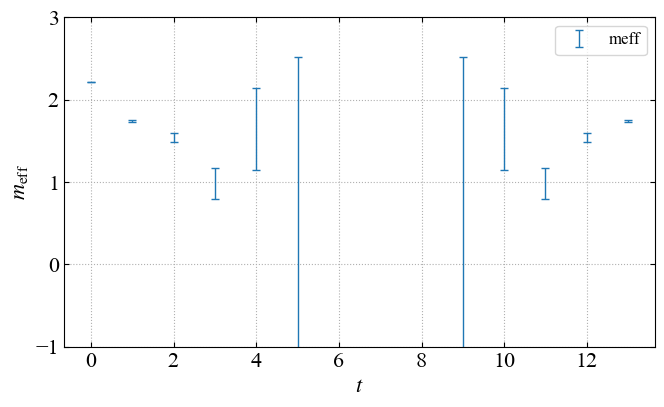

In [2]:
corr_conf_ls = gv.load("dump/gluon_corr_conf_ls.dat")
print(np.shape(corr_conf_ls))

corr_jk = jackknife(corr_conf_ls)
corr_gv = jk_ls_avg(corr_jk)
print(np.shape(corr_gv))

meff = pt2_to_meff(corr_gv, boundary="periodic")

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff)), gv.mean(meff), gv.sdev(meff), label="meff", **errorb)
ax.set_xlabel(r"$t$", **fs_p)
ax.set_ylabel(r"$m_{\mathrm{eff}}$", **fs_p)
ax.legend(**fs_small_p)
ax.set_ylim(-1, 3)
plt.tight_layout()
plt.show()
